In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
import sklearn.metrics

import time

# Kmeans Clustering

In [2]:
column_names = list(range(1,62))
pd.options.display.float_format = '{:,.4f}'.format

df = pd.read_csv("sonar.all-data", names = column_names, on_bad_lines='skip') 
df = df.rename({61: 'Correct classification'}, axis='columns')
df


,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Correct classification
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
#find number of null entries to see if there is a need to clean the dataset
df.isnull().sum()

1                         0
2                         0
3                         0
4                         0
5                         0
                         ..
57                        0
58                        0
59                        0
60                        0
Correct classification    0
Length: 61, dtype: int64

In [4]:
df.nunique()

1                         177
2                         182
3                         190
4                         181
5                         193
                         ... 
57                        121
58                        124
59                        119
60                        109
Correct classification      2
Length: 61, dtype: int64

In [5]:
num_clusters = df['Correct classification'].nunique()
num_clusters

2

In [6]:
test_data = df['Correct classification']
test_data

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: Correct classification, Length: 208, dtype: object

In [7]:
df = df.drop(columns = df.columns[-1])
df

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [8]:
df.nunique()

1     177
2     182
3     190
4     181
5     193
6     196
7     195
8     201
9     205
10    207
11    203
12    206
13    198
14    202
15    203
16    203
17    202
18    204
19    206
20    203
21    200
22    203
23    199
24    201
25    198
26    194
27    190
28    194
29    197
30    202
31    207
32    205
33    205
34    206
35    205
36    205
37    206
38    206
39    204
40    206
41    204
42    208
43    205
44    196
45    205
46    199
47    202
48    204
49    193
50    154
51    160
52    144
53    134
54    134
55    129
56    122
57    121
58    124
59    119
60    109
dtype: int64

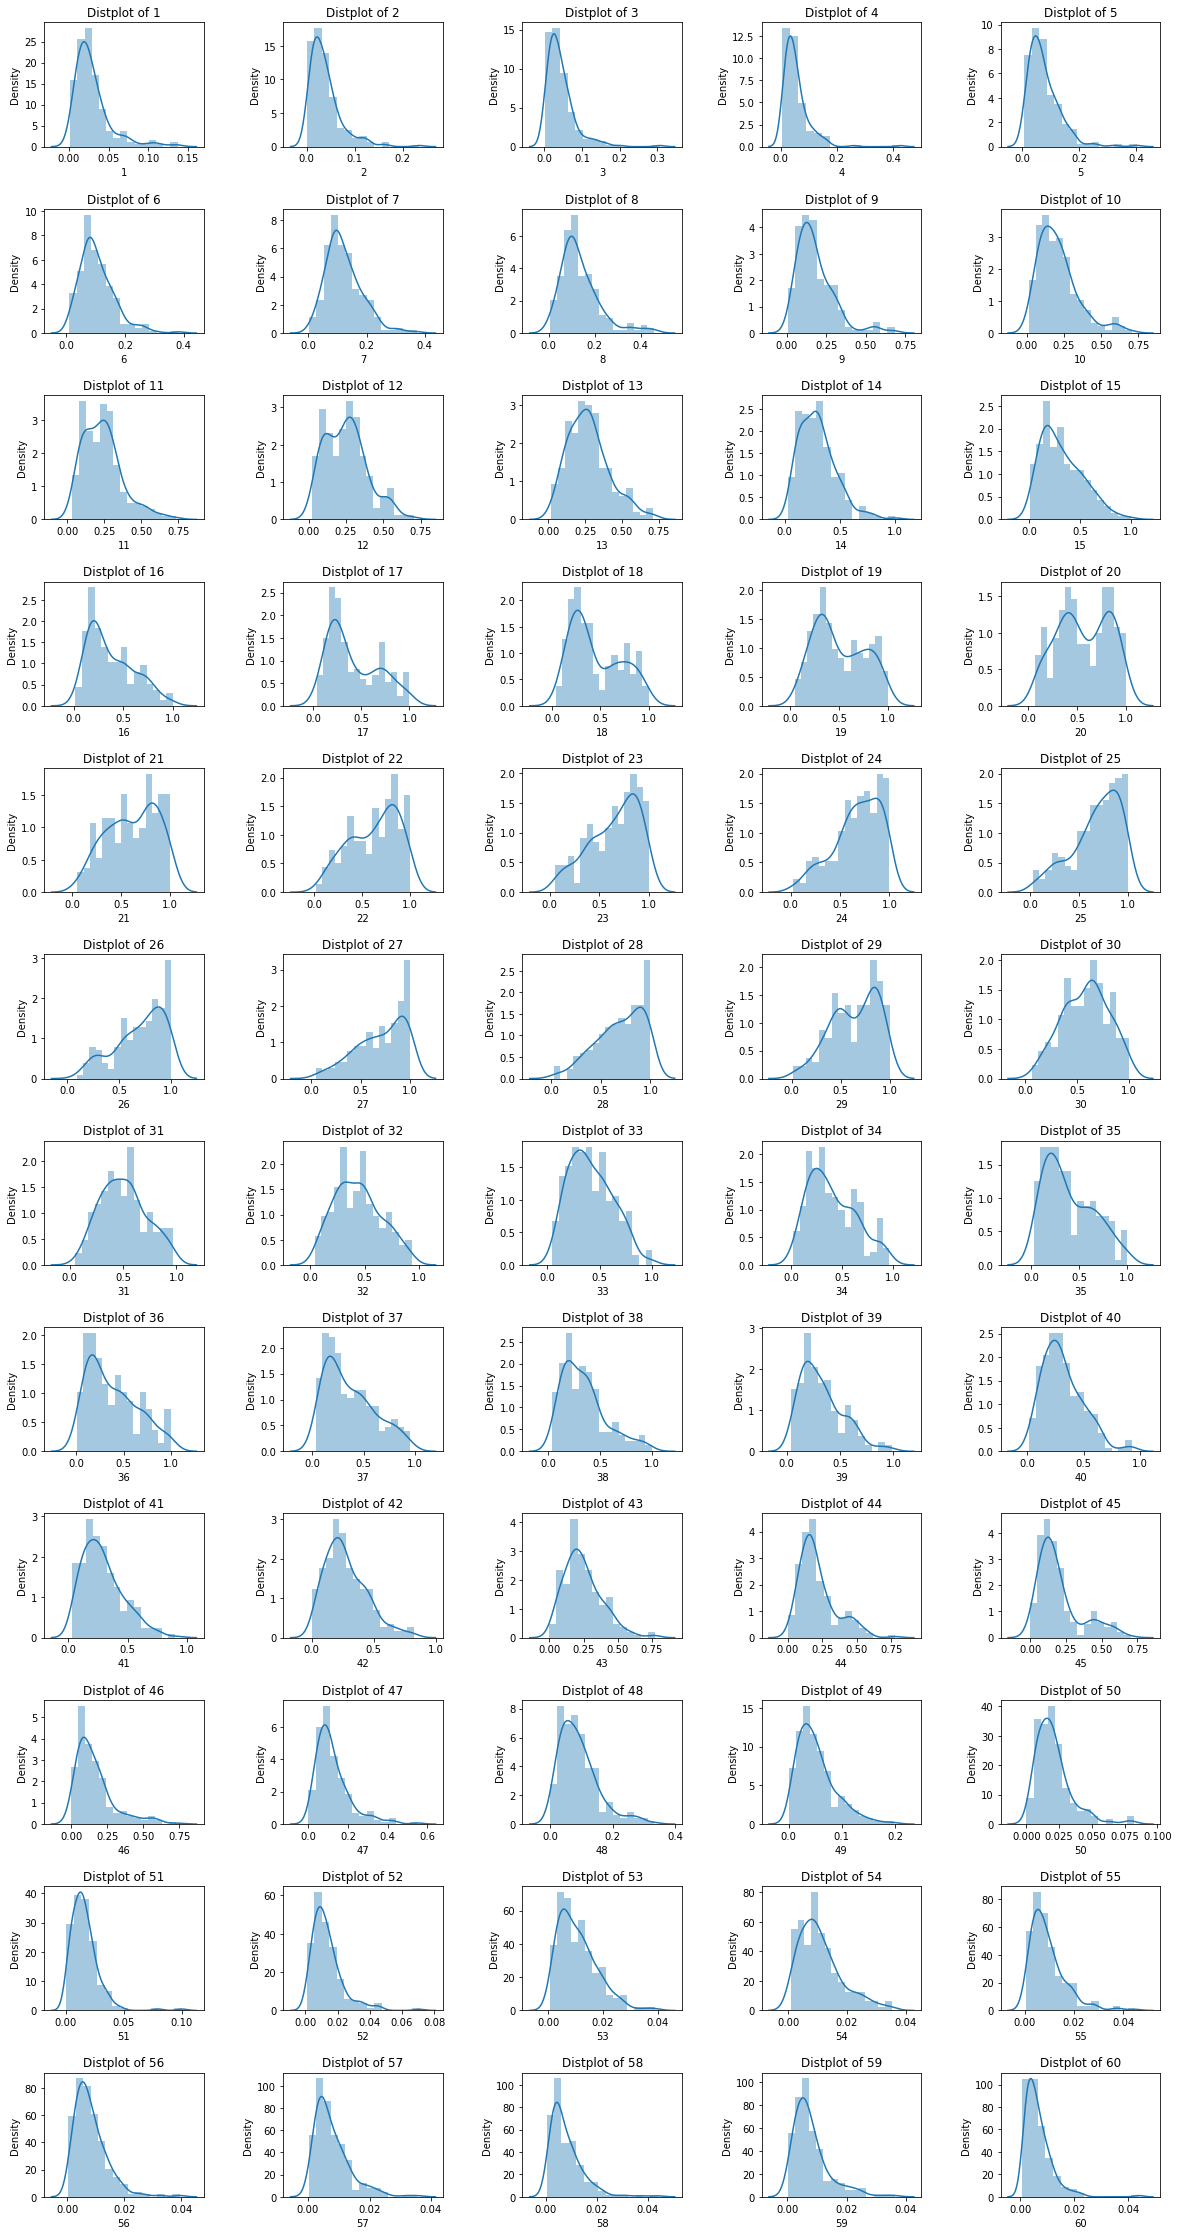

In [9]:
plt.figure(1 , figsize = (20 , 40))
n = 0 
for x in column_names:
    try:
        n += 1
        plt.subplot(12 , 5 , n)
        plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
        sns.distplot(df[x] , bins = 15)
        plt.title('Distplot of {}'.format(x))
    except:
        pass
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
for_visual = scaled_features_df.copy()
scaled_features_df

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,-0.3996,-0.0406,-0.0269,-0.7151,0.3645,-0.1013,0.5216,0.2978,1.1253,0.0212,...,0.5953,-1.1154,-0.5976,0.6809,-0.2956,1.4816,1.7638,0.0699,0.1717,-0.6589
1,0.7035,0.4216,1.0556,0.3233,0.7777,2.6072,1.5226,2.5110,1.3183,0.5887,...,-0.2979,-0.5223,-0.2569,-0.8432,0.0155,1.9010,1.0707,-0.4724,-0.4446,-0.4199
2,-0.1292,0.6011,1.7234,1.1722,0.4005,2.0933,1.9688,2.8524,3.2328,3.0661,...,-1.0659,1.0176,0.8364,-0.1978,1.2318,2.8272,4.1202,1.3094,0.2528,0.2576
3,-0.8356,-0.6489,0.4817,-0.7194,-0.9871,-1.1494,-0.1938,-0.0847,-1.0009,-0.6105,...,0.6704,-0.1374,-1.0093,0.5573,-0.1118,-0.1611,-0.4886,-0.5499,-0.6392,1.0346
4,2.0508,0.8565,0.1113,-0.3122,-0.2924,-0.6728,-0.0137,1.3173,1.5105,1.7722,...,-0.0391,-1.0738,-0.7538,-0.0605,0.2418,-1.1746,-0.1075,-0.4879,0.4474,0.5764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.4562,-0.1167,-0.7051,-0.7797,-0.6478,0.9910,1.3150,0.4073,0.4640,0.4485,...,0.3532,-0.1894,-0.1291,1.2301,-0.8472,0.3283,-0.2287,0.5502,1.8420,1.8316
204,0.1367,-0.8618,-0.3660,0.0540,0.0144,-0.1487,-0.3690,-0.3885,-0.6351,0.0533,...,-0.9156,-0.7617,-0.2001,0.3514,-0.4229,-0.3358,-0.7659,-0.7358,-0.2824,0.0384
205,1.0044,0.1601,-0.6738,-0.5320,-0.7236,0.2125,0.0641,-0.2001,-0.4420,0.3329,...,-0.0475,0.2684,-1.1087,-0.8020,-0.4371,0.1185,1.0707,0.9065,-0.0391,-0.6789
206,0.0495,-0.0954,0.1348,0.1488,-1.0556,0.5229,0.4016,-0.2649,0.1397,0.2024,...,-0.9907,-0.5015,-0.8674,0.2278,-0.8048,-0.8251,-0.7659,-0.0076,-0.7040,-0.3402


In [11]:
# import PCA
from sklearn.decomposition import PCA 
# Applying PCA to visualize data
pca = PCA(n_components = 2)
pca_data_visual = pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2']) 
pca_data = pca_data_visual.copy()
pca_data

,PC1,PC2
0,1.9212,-1.3709
1,-0.4801,7.5864
2,3.8592,6.4399
3,4.5974,-3.1041
4,-0.5339,1.8498
...,...,...
203,-1.2077,-0.9682
204,-2.9714,-2.7535
205,-2.2932,-2.7554
206,-3.1145,-1.8505


In [12]:
def kmeans_clustering(train_data, num_clusters, test_data):
    cluster_data = train_data.copy()
    kmeans = KMeans(n_clusters = num_clusters, random_state=42)
    kmeans.fit(train_data)
    #implement 3 other metrics here
    print('Classification Accuracy: ', classification_accuracy(cluster_data, kmeans.labels_, test_data))
    print('Davies Bouldin index: ', davies_bouldin(train_data, kmeans.labels_))
    print('Silhouetter Score: ', silhouette(train_data, kmeans.labels_))
    print('Calinski Harabasz Score: ', calinski_score(train_data, kmeans.labels_))

In [13]:
# train_data is the data we fit the clustering algorithm on (without the predict label and after all the cleaning, PCA, one_hot_encoding)
# predicted_clusters is the output we get from the clustering algorithm(eg:- kmeans.labels_)
# test_data is the predict label which we remove from the train_data

# train_data - DataFrame
# predicted_cluster - Series
# test_data - 

def classification_accuracy(train_data, predicted_clusters, test_data):
    actual_labels = test_data.value_counts().index.tolist()
    train_data['predicted_clusters'] = predicted_clusters
    cluster_labels = pd.value_counts(pd.Series(predicted_clusters))
    cluster_labels = np.stack([cluster_labels.keys().values, cluster_labels.values]).T
    cluster_labels = cluster_labels.tolist()
    for i in range(len(cluster_labels)):
        cluster_labels[i].append(actual_labels[i])
    cluster_labels.sort()
    train_data['predicted_labels'] = list(map(lambda x : cluster_labels[x][2], train_data['predicted_clusters']))
    sum(train_data['predicted_labels']==test_data)
    accuracy = sum(train_data['predicted_labels']==test_data)/len(test_data)
    return accuracy

def davies_bouldin(train_data, predicted_clusters):
    from sklearn.metrics import davies_bouldin_score
    return(davies_bouldin_score(train_data, predicted_clusters))

def silhouette(train_data, predicted_clusters):
    from sklearn.metrics import silhouette_score
    score = silhouette_score(train_data, predicted_clusters, metric='euclidean')
    return score

def calinski_score(train_data, predicted_clusters):
    from sklearn.metrics import calinski_harabasz_score
    return(calinski_harabasz_score(train_data, predicted_clusters))
#Example
#classification_accuracy(clustering_data, kmeans.labels_, test_data)

## Using the scaled data for kmeans 

In [14]:
kmeans =KMeans(n_clusters=num_clusters,random_state=42).fit(for_visual)

In [15]:
kmeans_clustering(scaled_features_df, num_clusters, test_data)

Classification Accuracy:  0.47596153846153844
Davies Bouldin index:  2.166795057515615
Silhouetter Score:  0.2178194633782484
Calinski Harabasz Score:  35.39515532020755


In [16]:
labels = kmeans.fit_predict(scaled_features_df)
scaled_features_df['cluster'] = pd.DataFrame(labels)
scaled_features_df['cluster'].value_counts()

1    156
0     52
Name: cluster, dtype: int64

In [17]:
test_data.value_counts()

M    111
R     97
Name: Correct classification, dtype: int64

## Using the pca data for kmeans and visualization 

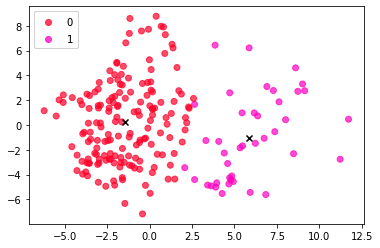

In [18]:
fig,ax = plt.subplots()
kmeans =KMeans(n_clusters=num_clusters,random_state=42).fit(pca_data)
pca_data_visual['cluster'] = pd.Categorical(kmeans.labels_)
scatter = ax.scatter(pca_data_visual['PC1'], pca_data_visual['PC2'],c=pca_data_visual['cluster'],cmap='gist_rainbow',alpha=0.7)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='black')
ax.add_artist(legend1)

In [19]:
kmeans_clustering(pca_data, num_clusters, test_data)

Classification Accuracy:  0.47115384615384615
Davies Bouldin index:  0.9584850593667174
Silhouetter Score:  0.441153342205089
Calinski Harabasz Score:  120.65480379377871


In [20]:
labels = kmeans.fit_predict(pca_data)
scaled_features_df['cluster'] = pd.DataFrame(labels)
scaled_features_df['cluster'].value_counts()

0    167
1     41
Name: cluster, dtype: int64

In [21]:
test_data.value_counts()

M    111
R     97
Name: Correct classification, dtype: int64

# Kmeans++ Clustering

In [22]:
scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
for_visual = scaled_features_df.copy()
scaled_features_df

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,-0.3996,-0.0406,-0.0269,-0.7151,0.3645,-0.1013,0.5216,0.2978,1.1253,0.0212,...,0.5953,-1.1154,-0.5976,0.6809,-0.2956,1.4816,1.7638,0.0699,0.1717,-0.6589
1,0.7035,0.4216,1.0556,0.3233,0.7777,2.6072,1.5226,2.5110,1.3183,0.5887,...,-0.2979,-0.5223,-0.2569,-0.8432,0.0155,1.9010,1.0707,-0.4724,-0.4446,-0.4199
2,-0.1292,0.6011,1.7234,1.1722,0.4005,2.0933,1.9688,2.8524,3.2328,3.0661,...,-1.0659,1.0176,0.8364,-0.1978,1.2318,2.8272,4.1202,1.3094,0.2528,0.2576
3,-0.8356,-0.6489,0.4817,-0.7194,-0.9871,-1.1494,-0.1938,-0.0847,-1.0009,-0.6105,...,0.6704,-0.1374,-1.0093,0.5573,-0.1118,-0.1611,-0.4886,-0.5499,-0.6392,1.0346
4,2.0508,0.8565,0.1113,-0.3122,-0.2924,-0.6728,-0.0137,1.3173,1.5105,1.7722,...,-0.0391,-1.0738,-0.7538,-0.0605,0.2418,-1.1746,-0.1075,-0.4879,0.4474,0.5764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.4562,-0.1167,-0.7051,-0.7797,-0.6478,0.9910,1.3150,0.4073,0.4640,0.4485,...,0.3532,-0.1894,-0.1291,1.2301,-0.8472,0.3283,-0.2287,0.5502,1.8420,1.8316
204,0.1367,-0.8618,-0.3660,0.0540,0.0144,-0.1487,-0.3690,-0.3885,-0.6351,0.0533,...,-0.9156,-0.7617,-0.2001,0.3514,-0.4229,-0.3358,-0.7659,-0.7358,-0.2824,0.0384
205,1.0044,0.1601,-0.6738,-0.5320,-0.7236,0.2125,0.0641,-0.2001,-0.4420,0.3329,...,-0.0475,0.2684,-1.1087,-0.8020,-0.4371,0.1185,1.0707,0.9065,-0.0391,-0.6789
206,0.0495,-0.0954,0.1348,0.1488,-1.0556,0.5229,0.4016,-0.2649,0.1397,0.2024,...,-0.9907,-0.5015,-0.8674,0.2278,-0.8048,-0.8251,-0.7659,-0.0076,-0.7040,-0.3402


In [23]:
pca = PCA(n_components = 2)
pca_data_visual = pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2']) 
pca_data = pca_data_visual.copy()
pca_data

,PC1,PC2
0,1.9212,-1.3709
1,-0.4801,7.5864
2,3.8592,6.4399
3,4.5974,-3.1041
4,-0.5339,1.8498
...,...,...
203,-1.2077,-0.9682
204,-2.9714,-2.7535
205,-2.2932,-2.7554
206,-3.1145,-1.8505


In [24]:
def plus_plus(ds, k, random_state=42):
    np.random.seed(42)
    centroids = [ds[0]]

    for _ in range(1, k):
        dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in ds])
        probs = dist_sq/dist_sq.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()
        
        for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break
        
        centroids.append(ds[i])

    return np.array(centroids)

In [25]:
ds_scaled = for_visual.to_numpy()

In [26]:
ds_pca = pca_data.to_numpy()

In [27]:
ds_scaled

array([[-0.39955135, -0.04064823, -0.02692565, ...,  0.06987027,
         0.17167808, -0.65894689],
       [ 0.70353822,  0.42163039,  1.05561832, ..., -0.47240644,
        -0.44455424, -0.41985233],
       [-0.12922901,  0.60106749,  1.72340448, ...,  1.30935987,
         0.25276128,  0.25758223],
       ...,
       [ 1.00438083,  0.16007801, -0.67384349, ...,  0.90652575,
        -0.03913824, -0.67887143],
       [ 0.04953255, -0.09539176,  0.13480381, ..., -0.00759783,
        -0.70402047, -0.34015415],
       [-0.13794908, -0.06497869, -0.78861924, ..., -0.6738235 ,
        -0.29860448,  0.99479044]])

In [28]:
ds_pca

array([[ 1.92116817, -1.37089312],
       [-0.48012458,  7.58638801],
       [ 3.8592282 ,  6.43986016],
       [ 4.59741943, -3.10408888],
       [-0.53386761,  1.84984701],
       [-1.24701593,  3.78548414],
       [ 1.87007312,  2.49551038],
       [-2.05769816,  2.3147504 ],
       [-1.64556277,  0.25372155],
       [-4.28065736, -2.42781795],
       [-1.46164351, -6.32305562],
       [-2.46394888, -1.2537634 ],
       [-3.99546982,  1.64506244],
       [ 0.6370814 , -0.63741683],
       [-0.10539302, -0.25210417],
       [ 2.11242307,  0.59393523],
       [ 4.39574903, -2.25749069],
       [ 1.43859617,  1.90219042],
       [-1.03943408, -3.29436397],
       [-1.16485881,  8.59655069],
       [ 2.64812566,  1.66803742],
       [ 6.23535677, -1.47389049],
       [11.23389579, -2.75609298],
       [-0.24732176, -4.86351661],
       [ 2.65154822, -4.39934635],
       [-0.42203896, -7.16826626],
       [-3.69919995,  2.49392786],
       [-2.90589296,  0.16356259],
       [-1.8957691 ,

In [29]:
centroids_scaled = plus_plus(ds_scaled, num_clusters)

In [30]:
centroids_pca = plus_plus(ds_pca, num_clusters)

In [31]:
def kmeans_clustering_plus(train_data, num_centroids, num_clusters, test_data):
    cluster_data = train_data.copy()
    kmeans = KMeans(n_clusters = num_clusters, init = num_centroids, random_state=42)
    kmeans.fit(train_data)
    #implement 3 other metrics here
    print('Classification Accuracy: ', classification_accuracy(cluster_data, kmeans.labels_, test_data))
    print('Davies Bouldin index: ', davies_bouldin(train_data, kmeans.labels_))
    print('Silhouetter Score: ', silhouette(train_data, kmeans.labels_))
    print('Calinski Harabasz Score: ', calinski_score(train_data, kmeans.labels_))

## Using the scaled data for kmeans++ 

In [32]:
kmeans =KMeans(n_clusters=num_clusters, init = centroids_scaled ,random_state=42).fit(for_visual)

In [33]:
kmeans_clustering_plus(for_visual, centroids_scaled, num_clusters, test_data)

Classification Accuracy:  0.4567307692307692
Davies Bouldin index:  2.455848400436219
Silhouetter Score:  0.12589938483067614
Calinski Harabasz Score:  30.712469560994986


In [34]:
labels = kmeans.fit_predict(scaled_features_df)
scaled_features_df['cluster'] = pd.DataFrame(labels)
scaled_features_df['cluster'].value_counts()

0    116
1     92
Name: cluster, dtype: int64

In [35]:
test_data.value_counts()

M    111
R     97
Name: Correct classification, dtype: int64

## Using the pca data for kmeans++ and visualization 

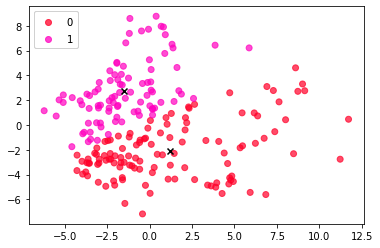

In [36]:
fig,ax = plt.subplots()
kmeans =KMeans(n_clusters=num_clusters, init = centroids_pca ,random_state=42).fit(pca_data)
pca_data_visual['cluster'] = pd.Categorical(kmeans.labels_)
scatter = ax.scatter(pca_data_visual['PC1'], pca_data_visual['PC2'],c=pca_data_visual['cluster'],cmap='gist_rainbow',alpha=0.7)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='black')
ax.add_artist(legend1)

In [37]:
kmeans_clustering_plus(pca_data, centroids_pca, num_clusters, test_data)

Classification Accuracy:  0.4423076923076923
Davies Bouldin index:  1.2221874631353993
Silhouetter Score:  0.3167823827652617
Calinski Harabasz Score:  98.54678412811539


In [38]:
labels = kmeans.fit_predict(pca_data)
pca_data['cluster'] = pd.DataFrame(labels)
pca_data['cluster'].value_counts()

0    117
1     91
Name: cluster, dtype: int64

In [39]:
test_data.value_counts()

M    111
R     97
Name: Correct classification, dtype: int64